In [1]:
import os
from os import path

os.environ["DEBUG"] = "true"

In [2]:
import os
from os import path

import random

import cv2
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import evaluate

from PIL import Image

from transformers import VisionEncoderDecoderModel, AutoTokenizer, TrOCRProcessor
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import default_data_collator

from data_aug_v2 import build_data_aug
from torch.utils.data import Subset
from tang_syn import synthesize
from train import OCRDataset, EvalDataset

MAX_LENGTH = 64

class InspectionDataset(OCRDataset):
    def __getitem__(self, idx):
        return self.get_image_and_text(idx)

def load_datasets(processor, tokenizer):
    dataset_dir = 'dataset/data'

    train_dataset = InspectionDataset(dataset_dir=dataset_dir,
                               labels_dir="dataset/labels/train",
                               tokenizer=tokenizer,
                               processor=processor,
                               mode="online",
                               transform=build_data_aug(
                                   height=64, mode="train", resizepad=False),
                               max_target_length=MAX_LENGTH)

    # Define the number of samples to keep in eval dataset

    eval_dataset = EvalDataset(dataset_dir=dataset_dir,
                               labels_dir="dataset/labels/test-ic13",
                               tokenizer=tokenizer,
                               processor=processor,
                               mode="eval",
                               transform=build_data_aug(
                                   height=64, mode="eval", resizepad=False),
                               max_target_length=MAX_LENGTH)

    # Create a random subset of the dataset
    num_samples = 100
    subset_indices = torch.randperm(len(eval_dataset))[:num_samples]
    eval_dataset = Subset(eval_dataset, subset_indices.tolist())

    print("Number of training examples:", len(train_dataset))
    print("Number of validation examples:", len(eval_dataset))

    return train_dataset, eval_dataset


model_pth = 'models/tang-syn-5.0-online-epoch-1'

tokenizer = AutoTokenizer.from_pretrained(model_pth)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
train_dataset, eval_dataset = load_datasets(
    processor=processor, tokenizer=tokenizer)

/opt/conda/envs/py_3.8/lib/python3.8/site-packages/torchvision-0.16.0a0+29418e3-py3.8-linux-x86_64.egg/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/envs/py_3.8/lib/python3.8/site-packages/torchvision-0.16.0a0+29418e3-py3.8-linux-x86_64.egg/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking 

pygame 2.5.1 (SDL 2.28.2, Python 3.8.17)
Hello from the pygame community. https://www.pygame.org/contribute.html


  0%|          | 0/1611 [00:00<?, ?it/s]


Usable font: 1


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
100%|██████████| 1/1 [00:00<00:00, 116.27it/s]

Number of training examples: 12800000
Number of validation examples: 100


串为空或只包含空格，则返回None
de
我也吃点饭，我只好顺水推舟吃了点，喝了两口蛋汤，聊了一会儿天就去睡了。
爆炸增长，不适合处理大规模的问题。但是，有一种叫做非递归汉诺塔
少，国际社会可能会出现太空资源争夺的问题。这可能会引发一些国际政治和道德方面的争议。 3. 太空殖民可能会引发文化冲突的问题。随
以。增强学习是一种通过与环境进行交互以最大化预期奖励的方式来学习决策的机器学
弹性时间，以便应对突发事件的影响。这样，如果出现突发事件，你就有足够的时间来适应。 2. 优先处理紧
，氢原子核会融合成氦原子核，释放出大量的能量。这些能量会使恒星核心膨胀，同时也会抵抗引力的作用，使恒
和结构的故事，通过生动的描写和鲜明的人物形象，带领读者进入故事情境，感受情感体验。同时，叙事诗也
data used to train AI algorithms is critical for ensuring that they are inclusive and unbiased. By using diverse and representative data, including data from underrepr


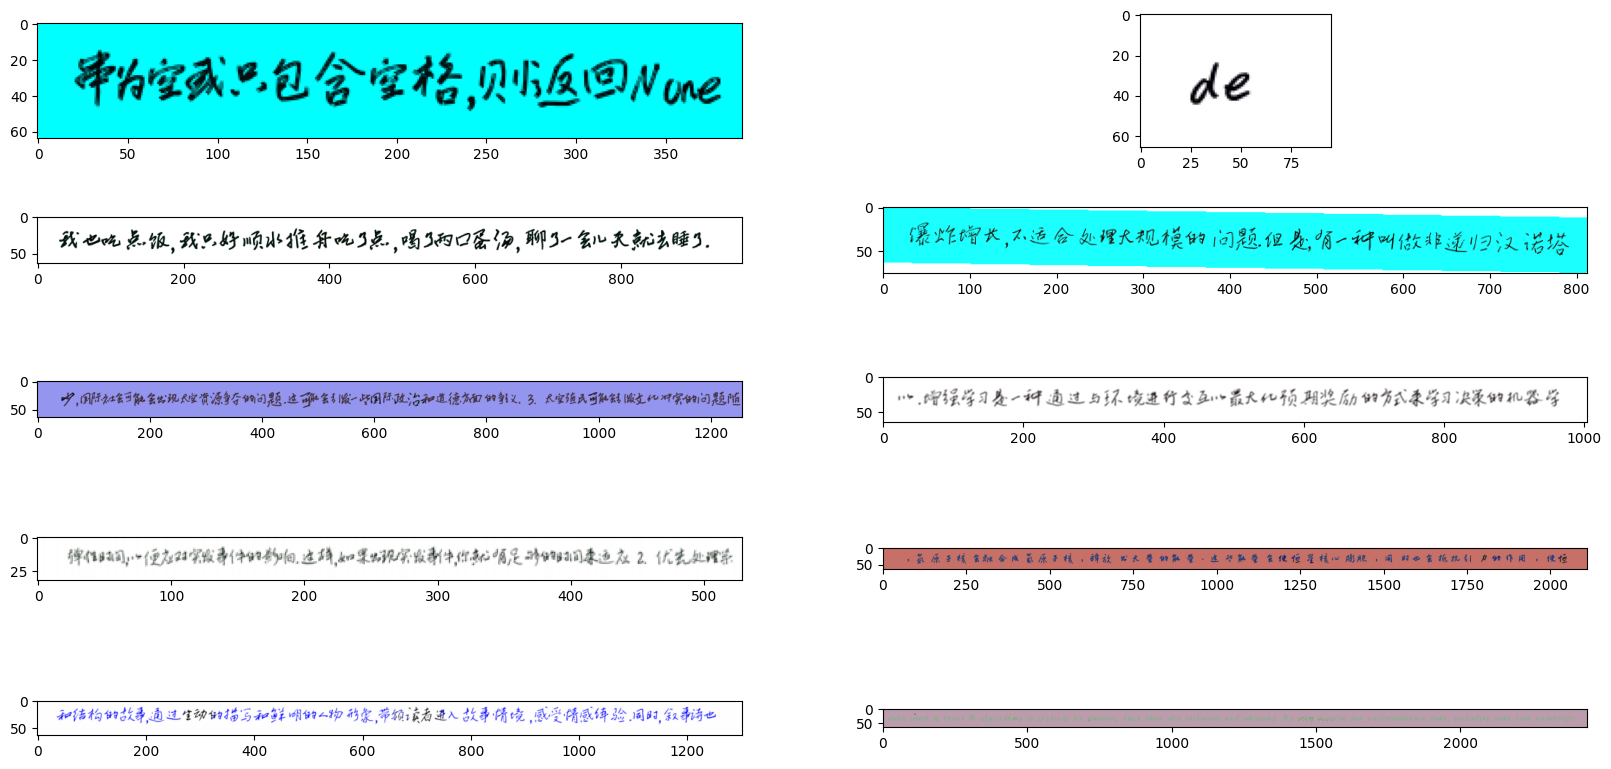

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Set the figure size

length = len(train_dataset)


for i in range(10):

    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

    plt.subplot(5, 2, i+1)  # Create a subplot for each image
    plt.imshow(res[0])  # Display the image

    print(res[1])

plt.show()

In [4]:
from tqdm import tqdm

for i in tqdm(range(1000)):
    random_index = random.randint(0, length - 1)
    res = train_dataset[random_index]

  3%|▎         | 29/1000 [00:04<02:57,  5.48it/s]

Unable to generate font metrics for 處理：系統能夠協助開發者從大量的數據中篩選出有用的資料，並進行清洗、轉換和格式化等處理
Unable to generate font metrics for 性能不如預期，我們可以調整它的超參數


 17%|█▋        | 170/1000 [00:25<02:05,  6.60it/s]

Unable to generate font metrics for 系統可以幫助您自動化許多家居事務，例如調整室內溫度、控制照明、監控家庭安全等。 3. 在線


KeyboardInterrupt: 